In [1]:
import sys
sys.path.append('../')
import latexStrings as ls
import numpy as np
import matplotlib.pyplot as plt
from math import *
from IPython.display import Latex
import odesolver

# Ejercicio 1

Tenemos el PVI:

\begin{equation} \label{eq:1}
y'= y + 2e^{-t} \qquad y(0) = 1 
\end{equation}

Dado que el lado derecho de la EDO, $y + 2e^{-t}$ es de clase $C^1$ para todo $(t,y)\in \mathbb{R}\times\mathbb{R}$, y por lo tanto Lipschitz Continua en dicha region, sabemos que existe una solucion unica a este problema, que en general es dada por:

\begin{equation} \label{eq:2}
y(t) = (y_0e^{-t_0} + e^{-2t_0}-e^{-2t})e^t
\end{equation}

Ahora apliquemos el metodo de Euler Explicito con paso $h=0.1$:

In [2]:
f = lambda t, y : y+2*np.exp(-t)
exact = lambda t, t0, y0 : np.exp(t)*(y0*np.exp(-t0)+np.exp(-2*t0)-np.exp(-2*t))
I = (0, 1)
y0 = 1

y1 = exact(1,0,1)

T, W = odesolver.solve(f,y0,I,10,method="Explicit Euler")

globalError = abs(W[0,10]-y1)
localErrors = [abs(W[0,i+1] - exact(T[i+1], T[i], W[0,i])) for i in range(10)]
maxLocalError = max(localErrors)

Latex("Aproximaciones: " + ls.latexList(W[0], 'w', form = '%0.7f') + "Error Global: "+str(globalError) + "Maximo Error Local: "+str(maxLocalError))

<IPython.core.display.Latex object>

Graficamente, observemos como se comporta la solucion exacta contra la aproximada:

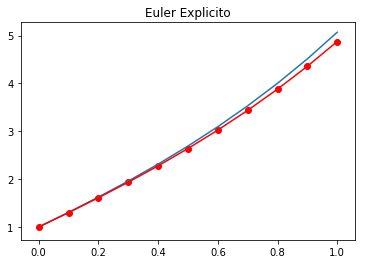

In [3]:
plt.plot(T,exact(T,0,1))
plt.title("Euler Explicito")
plt.plot(T,W[0], c='r')
plt.scatter(T,W[0], c='r')
plt.show()

Vemos que la solucion aproximada, auque sigue la direccion general, siempre va por debajo de la solucion verdadera. Esto se debe a que nuestra solucion general \ref{eq:2} es convexa en el intervalo donde estamos buscando la solucion, y por lo tanto el metodo subestima la pendiente en sus aproximaciones.

Ahora apliquemos el metodo de Euler Explicito con pasos $h = 0.1 \times 2^{-k}$ para $k \in \{0,1,\dots, 5\}$ en el intervalo $[0,1]$:

In [4]:
res = []
globalErrors=[]
steps = []

for k in range(6):
    
    h = 0.1*(2**-k)
    m = int((I[1]-I[0])/h)
    
    T, W = odesolver.solve(f, y0, I, m, method="Explicit Euler")
    
    g = abs(W[0,m]-y1)
    globalErrors.append(g)
    
    localErrors = [abs(W[0,i+1] - exact(T[i+1], T[i], W[0,i])) for i in range(m)]
    maxLocalError = max(localErrors)
    
    eoc = "NaN" if k==0 else log(g/prevg)/log(h/prevh)
    res.append([k, h, maxLocalError, eoc])
    
    prevh = h
    prevg = g

Observemos el comportamiento del error del metodo en relacion con el tamaño del paso:

In [5]:
header = ["k", "Paso", "Error Local Maximo", "eoc"]
Latex(ls.latexTable(header, res, '|c|r r r|'))

<IPython.core.display.Latex object>

Sabemos que en teoria, los pasos de Euler Explicito tienen un error del orden de $O(h^2)$, mientras que el error global es de orden $O(h)$. En efecto, vemos que el error local maximo siempre cumple la cota deseada, pues en el peor de los casos, cuando $h=0.1$, el error es aproximadamente $0.022 = 2.2h^2$, y conforme disminuye el tamaño de los pasos se sigue cumpliendo la cota.

Por otro lado, observamos que la razon de convergencia experimental (eoc) empieza siendo 0.93 pero rapidamente se aproxima a  1 conforme disminuye el tamaño de los pasos utilizados en su calculo. Esto nos lleva a la conclusion de que el error global en efecto es de orden 1, lo cual es aun mas evidente al observar el comportamiento del error en terminos del tamaño del paso, como se muestra en la siguiente grafica:

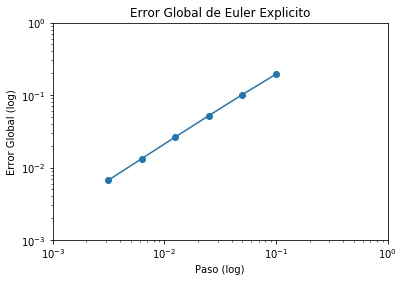

In [6]:
steps = [i[1] for i in res]

plt.title("Error Global de Euler Explicito")
plt.plot(steps,globalErrors)
plt.scatter(steps, globalErrors)
plt.xscale('log')
plt.xlabel('Paso (log)')
plt.yscale('log')
plt.ylabel('Error Global (log)')
plt.axis([1e-3,1,1e-3,1])
plt.show()

Podemos observar que, en escala logaritmica, el error global y el paso tienen una relacion lineal, que es lo esperado de un metodo con error global de orden $O(h)$.